In [ ]:
#!pip install netCDF4 h5netcdf xarray
#!pip install --upgrade matplotlib

In [ ]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
import getpass
import xarray as xr
import numpy as np
import pandas as pd

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Heatwaves
# Set path for the heatwaves data
path_hw = "/content/drive/MyDrive/ColabNotebooks/dataProgettoML/09_heat_waves_climatological-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

hw = xr.open_dataset(path_hw, engine="h5netcdf")#opening
hw #info

<xarray.Dataset> Size: 61MB
Dimensions:  (time: 151, lat: 185, lon: 271)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1950-01-01 1951-01-01 ... 2100-01-01
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
    height   float64 8B ...
Data variables:
    data     (time, lat, lon) int64 61MB ...

In [ ]:
#example of plot
hw.data[150].plot()

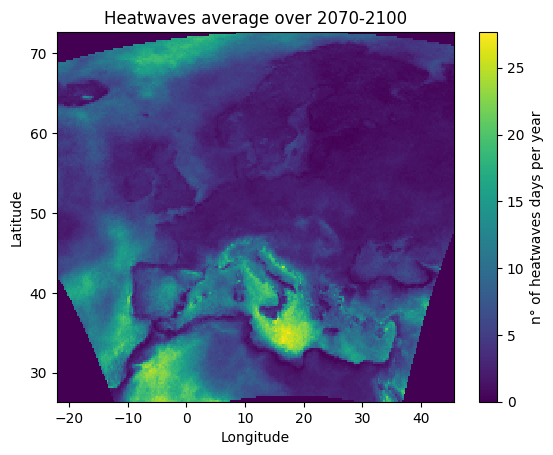

In [ ]:
#How to select the 30 years period of interest for heatwaves
hwsel=hw.sel(time=slice('2071-01-01T00:00:00.000000000','2100-01-01T00:00:00.000000000'))
# averaging the last 30 years
hw_data=hwsel["data"]
hw_datamean = hw_data.mean(dim='time')
# plotting
ax=hw_datamean.plot()
plt.title("Heatwaves average over 2070-2100")  # Add a title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
ax.colorbar.set_label("n° of heatwaves days per year")  # Set a more descriptive label
plt.savefig("plot.pdf", format="pdf") #saving for including it in LaTeX
plt.show()

In [ ]:
#Precipitation
# path to the precipitation data file:
path_precip = "/content/drive/MyDrive/ColabNotebooks/dataProgettoML/15_frequency_of_extreme_precipitation-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

precip = xr.open_dataset(path_precip, engine="h5netcdf")#opening
precip#checking dimensions,formats and variables ! data variables are not in integer and in nanoseconds. Need to convert them in days.

<xarray.Dataset> Size: 61MB
Dimensions:  (time: 151, lat: 185, lon: 271)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1950-01-01 1951-01-01 ... 2100-01-01
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
Data variables:
    data     (time, lat, lon) timedelta64[ns] 61MB ...

In [ ]:
precip_alldata = precip["data"]
a = precip_alldata.values.astype('timedelta64[D]')  # Convert to days
a = np.where(np.isnan(a), 0, a) #setting missing data to 0. The 0 values do not impact the period under analysis from 2071 al 2100.
precip_int = a.astype(int)#changin the format from timedelta64[ns] to int[64]
precip_int#checking if the missing values are 0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print("NaN count:", np.isnan(precip_int).sum())  # Should be 0: OK!

In [ ]:
# Create an xarray DataArray with explicit dimension names and coordinates
new_precip_int = xr.DataArray(
    precip_int,
    dims=['time', 'lat', 'lon'],
    coords={'time': precip['time'], 'lat': precip['lat'], 'lon': precip['lon']},
    name="data_int")

# Add the new variable to the dataset
precip["data_int"] = new_precip_int

In [ ]:
precip.data_int[150].plot()

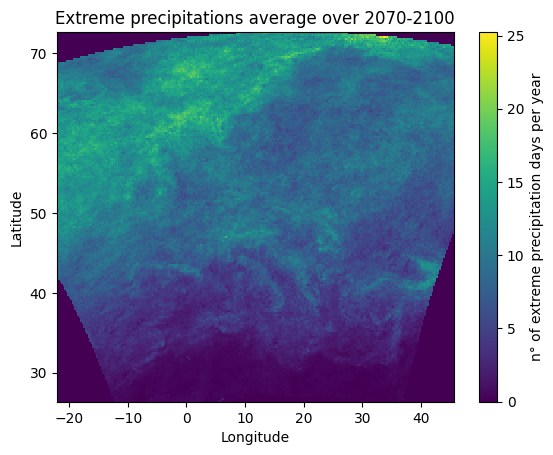

In [ ]:
# How to select the 30 years period of interest for precipitations
precipsel=precip.sel(time=slice('2071-01-01T00:00:00.000000000','2100-01-01T00:00:00.000000000'))
# averaging the last 30 years
precip_data=precipsel["data_int"]
precip_datamean = precip_data.mean(dim='time')
# plotting
bx=precip_datamean.plot()
plt.title("Extreme precipitations average over 2070-2100")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
bx.colorbar.set_label("n° of extreme precipitation days per year")
plt.show()

In [ ]:
#Wind
# path to the Wind data file:
path_wind = "/content/drive/MyDrive/ColabNotebooks/dataProgettoML/24_extreme_wind_speed_days-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"

wind = xr.open_dataset(path_wind, engine="h5netcdf")#opening
wind#checking dimensions,formats and variables ! data variables are not in integer and in nanoseconds. Need to convert them in days.

<xarray.Dataset> Size: 61MB
Dimensions:  (time: 151, lat: 185, lon: 271)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1950-01-01 1951-01-01 ... 2100-01-01
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
    height   float64 8B ...
Data variables:
    data     (time, lat, lon) timedelta64[ns] 61MB ...

In [ ]:
wind_alldata = wind["data"]
b = wind_alldata.values.astype('timedelta64[D]')  # Convert to days
b = np.where(np.isnan(b), 0, b) #eliminating missing data
wind_int = b.astype(int)

In [ ]:
# Create an xarray DataArray with explicit dimension names and coordinates
new_wind_int = xr.DataArray(
    wind_int,
    dims=['time', 'lat', 'lon'],
    coords={'time': wind['time'], 'lat': wind['lat'], 'lon': wind['lon']},
    name="data_int")

# Add the new variable to the dataset
wind["data_int"] = new_wind_int

In [ ]:
wind.data_int[140].plot()

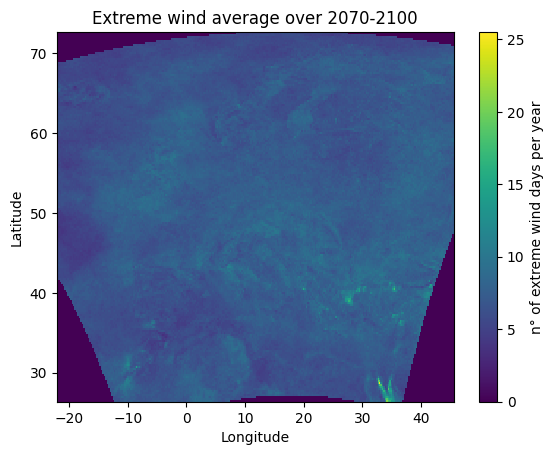

In [ ]:
# How to select the 30 years period of interest for precipitations
windsel=wind.sel(time=slice('2071-01-01T00:00:00.000000000','2100-01-01T00:00:00.000000000'))
# averaging the last 30 years
wind_data=windsel["data_int"]
wind_datamean = wind_data.mean(dim='time')
# plotting
cx=wind_datamean.plot()
plt.title("Extreme wind average over 2070-2100")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cx.colorbar.set_label("n° of extreme wind days per year")
plt.show()

Strange; seems that, from the model's projections, extreme wind speed days in the future strained climate will be way less (ex: try to change the slice from last 30 years to the whole dataset - the colour will be brighter)

In [ ]:
#Dry days
# Set path
path_dry = "/content/drive/MyDrive/ColabNotebooks/dataProgettoML/18_consecutive_dry_days-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"
dry = xr.open_dataset(path_dry, engine="h5netcdf")#opening
dry

<xarray.Dataset> Size: 61MB
Dimensions:  (lat: 185, lon: 271, time: 151)
Coordinates:
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
  * time     (time) datetime64[ns] 1kB 1950-01-01 1951-01-01 ... 2100-01-01
Data variables:
    cdd      (time, lat, lon) float64 61MB ...

In [ ]:
dry.cdd[148].plot()

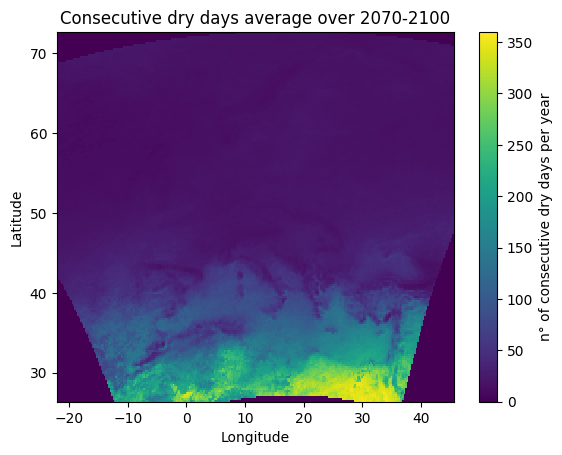

In [ ]:
# slicing
drysel=dry.sel(time=slice('2071-01-01T00:00:00.000000000','2100-01-01T00:00:00.000000000'))
# averaging the last 30 years
dry_data=drysel["cdd"]
dry_datamean = dry_data.mean(dim='time')
# plotting
dx=dry_datamean.plot()
plt.title("Consecutive dry days average over 2070-2100")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
dx.colorbar.set_label("n° of consecutive dry days per year")
plt.show()

In [ ]:
#Drought days
# Set path
path_drought = "/content/drive/MyDrive/ColabNotebooks/dataProgettoML/19_duration_of_meteorological_droughts-projections-yearly-rcp_4_5-cclm4_8_17-mpi_esm_lr-r1i1p1-grid-v1.0.nc"
drought = xr.open_dataset(path_drought, engine="h5netcdf")#opening
drought

<xarray.Dataset> Size: 61MB
Dimensions:  (lat: 185, lon: 271, time: 151)
Coordinates:
  * lat      (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon      (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
  * time     (time) datetime64[ns] 1kB 1950-01-01 1951-01-01 ... 2100-01-01
Data variables:
    dmd      (time, lat, lon) int64 61MB ...

In [ ]:
drought.dmd[121].plot()

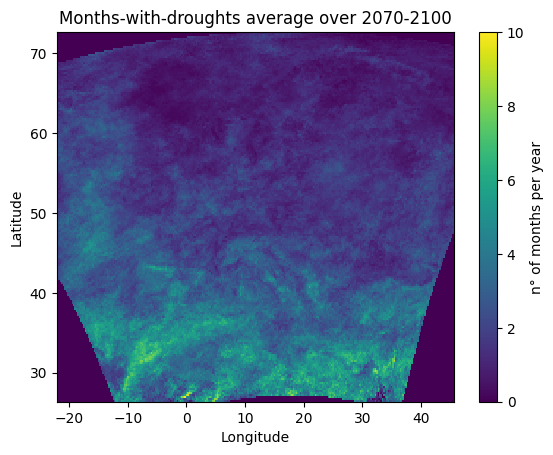

In [ ]:
# slicing
droughtsel=drought.sel(time=slice('2071-01-01T00:00:00.000000000','2100-01-01T00:00:00.000000000'))
# averaging the last 30 years
drought_data=droughtsel["dmd"]
drought_datamean = drought_data.mean(dim='time')
# plotting
ex=drought_datamean.plot()
plt.title("Months-with-droughts average over 2070-2100")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
ex.colorbar.set_label("n° of months per year")
plt.show()

In [ ]:
#come ottenere un valore solo (per un singolo gridded point per un certo anno)
value = precip_data.sel(time='2082-01-01T00:00:00.000000000',lat=61, lon=0).values
print("Single value:", value)

Single value: 12


----------------------------------------CLUSTERING PART------------------------------------------------

In [ ]:
!apt-get install -y libgeos-dev
!pip install basemap basemap-data-hires
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans

# Function to plot the map
def draw_earth(ds):
    llon, ulon = ds.lon.min().item(), ds.lon.max().item()
    llat, ulat = ds.lat.min().item(), ds.lat.max().item()

    my_map = Basemap(projection='merc',
                      resolution='l',
                      area_thresh=1000.0,
                      llcrnrlon=llon, llcrnrlat=llat,
                      urcrnrlon=ulon, urcrnrlat=ulat)
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary()
    return my_map

In [ ]:
# Merge datasets into a single xarray dataset, dropping conflicting variables
mergeddata = xr.Dataset({
    "heatwave": hw_datamean.drop_vars('height', errors='ignore'),  # Drop 'height' if it exists
    "precipitation": precip_datamean,
    "wind": wind_datamean.drop_vars('height', errors='ignore'),
    "dry": dry_datamean,
    "drought": drought_datamean
})

In [ ]:
# Flatten the dataset: reshape each variable into 1D, stack lat/lon
stacked=mergeddata.to_array(dim="variables").stack(spatial=("lat", "lon"))
# Convert to a Numpy array for processing
X=stacked.values.T
# Normalise
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [ ]:
# K-Means clustering with 6 clusters
k_means = KMeans(n_clusters=6, max_iter=100, n_init=2, random_state=42)
clusters = k_means.fit_predict(X)

# Reshape labels to match the spatial grid
clusters = clusters.reshape(mergeddata.heatwave.shape)

In [ ]:
import matplotlib.colors
import matplotlib.cm as cm

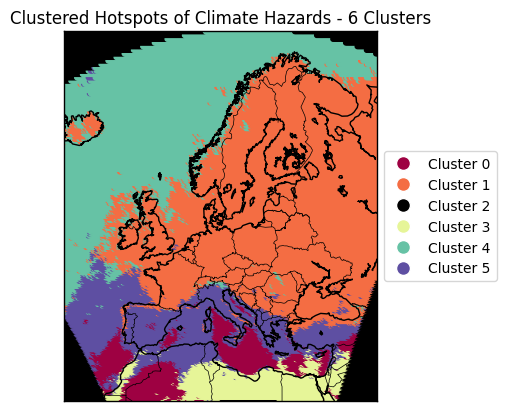

In [ ]:
# Plotting clusters
my_map = draw_earth(mergeddata)
lon, lat = np.meshgrid(mergeddata.lon.values, mergeddata.lat.values)
x, y = my_map(lon, lat)
# Creating a custom colormap with black for cluster 2
unique_clusters = np.unique(clusters)
colors = cm.Spectral(np.linspace(0, 1, len(unique_clusters)))
colors[2] = [0, 0, 0, 1]  # Set cluster 2 to black
cmap = matplotlib.colors.ListedColormap(colors)
sc = my_map.scatter(x, y, c=clusters, s=10, marker='o', cmap=cmap)
plt.title("Clustered Hotspots of Climate Hazards - 6 Clusters")
handles = []
labels = []
for label in unique_clusters:
    if label == 2:  # Special case for cluster 2 (black)
        color = [0, 0, 0, 1]  # Set color to black (RGBA)
    else:
        color = cm.Spectral(label / (len(unique_clusters) - 1))  # Use Spectral for others

    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
                              markerfacecolor=color, markersize=10))
    labels.append(f'Cluster {label}')
plt.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
df = pd.DataFrame(X)
df['labels'] = clusters.reshape(-1) #reshapes the clusters array into a 1-dimensional array (a single column)
df.columns = ['heatwaves', 'precipitation', 'wind', 'dry', 'drought', 'labels'] #assigning column names

In [ ]:
data = []
for i in range(len(labels)):
  temp_df = df[df['labels'] == i] #data for specific cluster
  data.append(np.mean(temp_df, axis = 0).values) #mean of every column (variable) appended to "data"
data = pd.DataFrame(data) #transforming to Pandas dataframe object
data.columns = df.columns #adding the name of the columns
data

,heatwaves,precipitation,wind,dry,drought,labels
0,2.236554,-1.047246,0.207850,1.269914,1.077537,0.0
1,-0.610848,0.298248,0.475789,-0.429221,-0.399490,1.0
2,-1.043088,-1.553179,-2.949304,-0.730567,-1.373968,2.0
3,-0.024930,-1.404882,0.217352,2.664907,1.827610,3.0
4,0.264184,1.315289,-0.084715,-0.506595,-0.494304,4.0
5,0.602273,-0.386398,0.240735,0.149321,0.873206,5.0


In [ ]:
# (RUN ONLY 1 TIME)
cols = data.columns.values.tolist() #retrieving column names and assigning them to "cols"
cols = [cols[-1]] + cols[:-1] #last column name + (all others minus the last one)
data = data[cols] #reordering the dataframe "data" according to new order specified in "cols"
data

,labels,heatwaves,precipitation,wind,dry,drought
0,0.0,2.236554,-1.047246,0.207850,1.269914,1.077537
1,1.0,-0.610848,0.298248,0.475789,-0.429221,-0.399490
2,2.0,-1.043088,-1.553179,-2.949304,-0.730567,-1.373968
3,3.0,-0.024930,-1.404882,0.217352,2.664907,1.827610
4,4.0,0.264184,1.315289,-0.084715,-0.506595,-0.494304
5,5.0,0.602273,-0.386398,0.240735,0.149321,0.873206


This is the table to be attached in LaTeX. From this one we have assessed the characteristics of each clusters, and so have given their names.

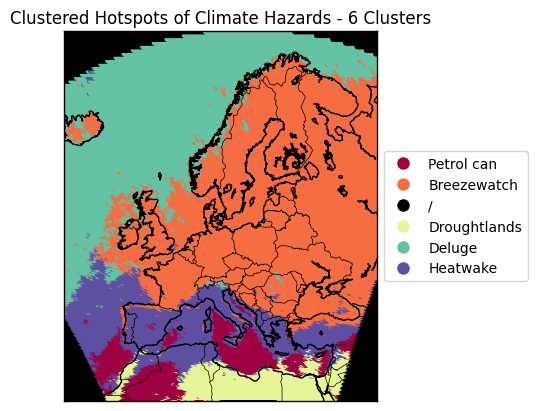

In [ ]:
# Plotting clusters with given labels
my_map = draw_earth(mergeddata)
lon, lat = np.meshgrid(mergeddata.lon.values, mergeddata.lat.values)
x, y = my_map(lon, lat)
colors = cm.Spectral(np.linspace(0, 1, len(unique_clusters)))
colors[2] = [0, 0, 0, 1]
cmap = matplotlib.colors.ListedColormap(colors)
sc = my_map.scatter(x, y, c=clusters, s=10, marker='o', cmap=cmap)
plt.title("Clustered Hotspots of Climate Hazards - 6 Clusters")
unique_clusters = np.unique(clusters)
handles = []
#Setting the chosen labels
labels = ['Petrol can', 'Breezewatch','/','Droughtlands','Deluge','Heatwake']
for label in unique_clusters:
    if label == 2:
        color = [0, 0, 0, 1]
    else:
        color = cm.Spectral(label / (len(unique_clusters) - 1))

    handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}',
                              markerfacecolor=color, markersize=10))
plt.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

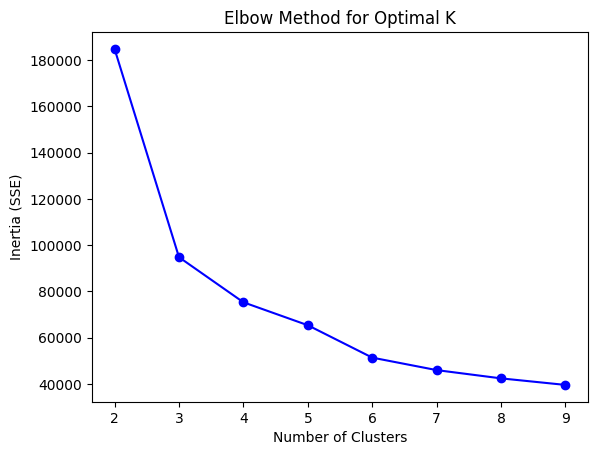

In [ ]:
#elbow method to check the best number of clusters
inertia = []
for k in range(2, 10):  # Testing different K values
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

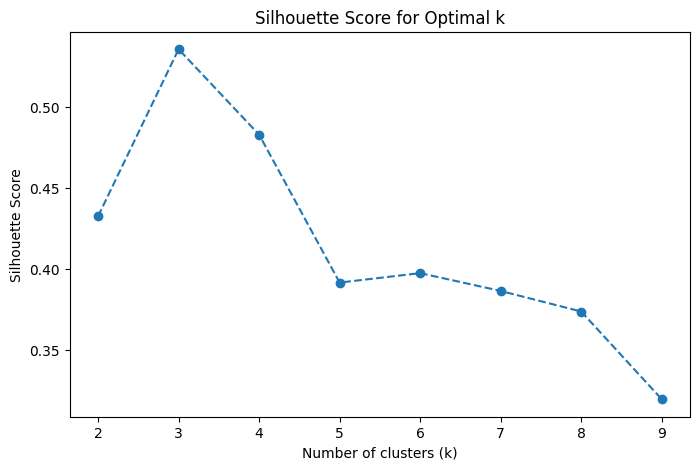

In [ ]:
silhouette_scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

k_values = range(2, 10)
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()